# Exploratory Data Analysis
### Phone Data Harvest
##### Daniel Herrera, Jack Brown & Ramon Burkhard

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Loading the merged dataset
Stored locally at "Data/merged_products_20240416.csv"

In [2]:
df_phones = pd.read_csv("data/merged_products_20240416.csv")
df_phones
# df_phones = df_phones.drop(columns=['inner_id'])

,id,source,brand,model,memory_GB,camera_MP,size,color,rating_100,reviews_count,price,delivery_time,screen_price_ratio,date
0,1,mediamarkt,apple,iphone 15,128.0,48.0,6.10,black,96.0,24,719.00,2.0,0.008484,2024-04-15
1,2,mediamarkt,xiaomi,redmi a2,32.0,8.0,6.52,black,82.0,10,79.95,2.0,0.081551,2024-04-15
2,3,mediamarkt,apple,iphone 15 pro,256.0,48.0,6.10,black titanium,98.0,15,1029.00,2.0,0.005928,2024-04-15
3,4,mediamarkt,apple,iphone 15 pro max,256.0,48.0,6.70,black titanium,98.0,13,1129.00,2.0,0.005934,2024-04-15
4,5,mediamarkt,apple,iphone 15,128.0,48.0,6.10,yellow,0.0,0,719.00,2.0,0.008484,2024-04-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,1867,galaxus,samsung,galaxy note 20 ultra de,512.0,108.0,6.90,mystic bronze,0.0,3,1190.01,1.0,0.005798,2024-04-16
1867,1868,galaxus,xiaomi,13 pro,512.0,50.3,6.73,ceramic black,88.0,36,800.00,1.0,0.008412,2024-04-16
1868,1869,galaxus,asus,rog phone 8,256.0,50.0,6.78,phantom black,0.0,0,964.00,1.0,0.007033,2024-04-16
1869,1870,galaxus,emporia,me6 (5g) with panic button,128.0,50.0,6.58,black,0.0,0,309.00,1.0,0.021294,2024-04-16


### Set color palette for each reseller

In [3]:
custom_palette = {'mediamarkt': '#fb8f67', 'interdiscount': '#1CCAD8', 'galaxus': '#AA6DA3'}

## 1. Count per source

Total count: 1871


FileNotFoundError: [Errno 2] No such file or directory: 'Plots/01_barplot.svg'

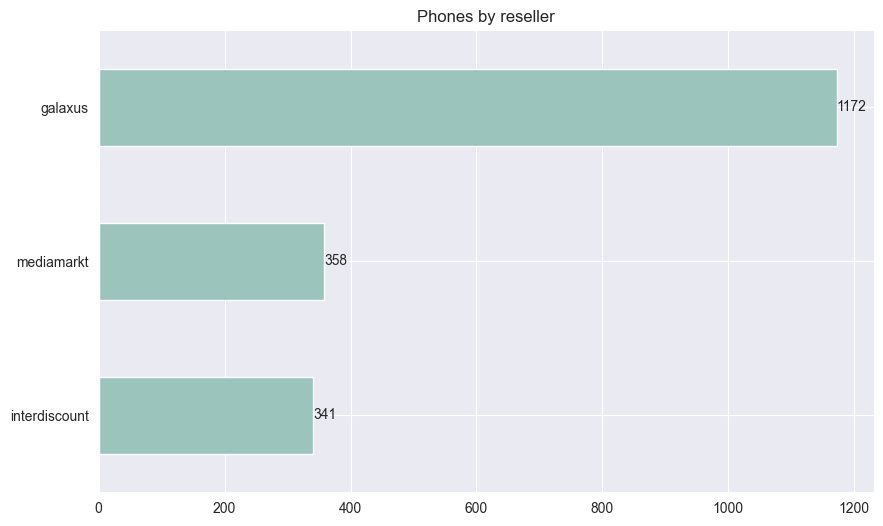

In [4]:
# BARPLOT: OVERALL COUNT PER SOURCE

source_counts = df_phones['source'].value_counts().sort_values()
print(f"Total count: {source_counts.sum()}")

# Plot the horizontal bar plot
plt.figure(figsize=(10, 6))
ax = source_counts.plot(kind='barh', color='#9BC4BC')

# Annotate the count values on the bars
for i, count in enumerate(source_counts):
    ax.text(count, i, str(count), ha='left', va='center')

plt.title('Phones by reseller')
plt.xlabel('')
plt.ylabel('')

plt.savefig('Plots/01_barplot.svg', format='svg')

## 2. Quality of the data: missing values

C:\Users\leina\AppData\Local\Temp\ipykernel_3168\4114558356.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_values_counts = df_phones.groupby('source').apply(lambda x: x.isnull().sum())
C:\Users\leina\AppData\Local\Temp\ipykernel_3168\4114558356.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  total_rows_by_source = df_phones.groupby('source').apply(lambda x: len(x))
C:\Users\leina\AppData\Lo

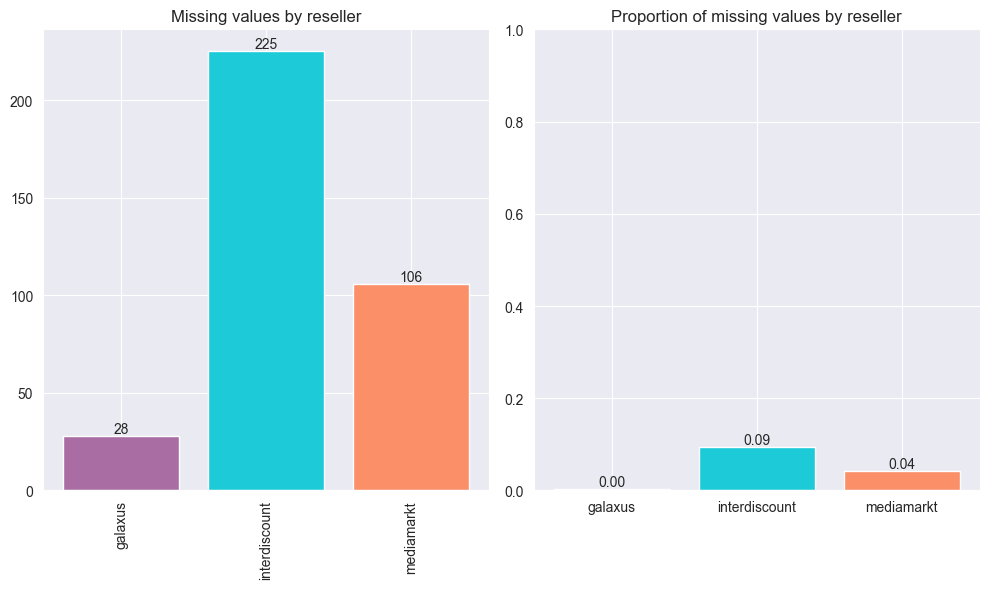

In [18]:
# Grouping by 'source' and calculating count of missing values
missing_values_counts = df_phones.groupby('source').apply(lambda x: x.isnull().sum())
missing_values_counts['Total'] = missing_values_counts.sum(axis=1)

# Grouping by 'source' and calculating the total rows within each group
total_rows_by_source = df_phones.groupby('source').apply(lambda x: len(x))

# Calculate total cells for each source
total_cells_by_source = df_phones.groupby('source').apply(lambda x: x.size)

# Calculating proportion of missing values against the total count of cells for each source
missing_values_proportion = missing_values_counts.div(total_cells_by_source, axis=0)
missing_values_proportion['Total'] = missing_values_proportion.sum(axis=1)

# Creating subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Color assignment for each source
colors = [custom_palette.get(source, 'gray') for source in missing_values_counts.index]

# Plotting count of missing values with custom colors and adding count numbers per bar
for i, (source, count) in enumerate(zip(missing_values_counts.index, missing_values_counts['Total'])):
    axs[0].bar(source, count, color=colors[i])
    axs[0].text(i, count, str(count), ha='center', va='bottom')

axs[0].set_title('Missing values by reseller')
axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[0].tick_params(axis='x', rotation=90)

# Plotting proportion of missing values with custom colors and setting y-axis limit to 1
for i, (source, proportion) in enumerate(zip(missing_values_proportion.index, missing_values_proportion['Total'])):
    axs[1].bar(source, proportion, color=colors[i])
    axs[1].text(i, proportion, f"{proportion:.2f}", ha='center', va='bottom')

axs[1].set_title('Proportion of missing values by reseller')
axs[1].set_xlabel('')
axs[1].set_ylabel('')
axs[1].set_ylim(0, 1)  # Setting y-axis limit to 1

plt.tight_layout()
plt.savefig('Plots/02_missing_values.svg', format='svg')

In [19]:
missing_values_counts

,id,source,brand,model,memory_GB,camera_MP,size,color,rating_100,reviews_count,price,delivery_time,screen_price_ratio,date,Total
source,,,,,,,,,,,,,,,
galaxus,0,0,0,0,0,0,0,0,0,0,0,28,0,0,28
interdiscount,0,0,0,0,6,1,0,0,200,0,0,18,0,0,225
mediamarkt,0,0,0,0,0,5,0,0,0,0,0,101,0,0,106


## 3. Prices: boxplots and extreme values

FileNotFoundError: [Errno 2] No such file or directory: 'Plots/03_boxplots.svg'

<Figure size 1000x600 with 0 Axes>

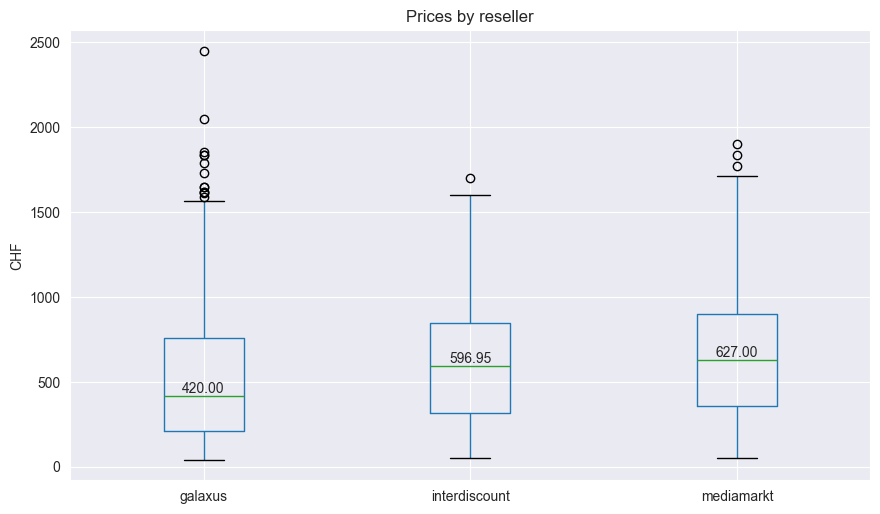

In [8]:
# BOXPLOT - PRICES BY RESELLER

plt.figure(figsize=(10, 6))
ax = df_phones.boxplot(column='price', by='source', figsize=(10, 6))

# Add median values to the plot
medians = df_phones.groupby('source')['price'].median()
for i, median in enumerate(medians):
    ax.text(i + 1, median, f"{median:.2f}", ha='center', va='bottom')

ax.set_title('')
plt.xlabel('')
plt.ylabel('CHF')
plt.title('Prices by reseller')  # Set a new title above the subplot
plt.suptitle('', y=0)  # Set a new title above the subplot

plt.savefig('Plots/03_boxplots.svg', format='svg')

In [9]:
# CHEAPEST AND MOST EXPENSIVE ITEMS ON EACH SITE

# Group the DataFrame by 'source' and find the indices of the highest and lowest prices for each group
highest_prices_indices = df_phones.groupby('source')['price'].idxmax()
lowest_prices_indices = df_phones.groupby('source')['price'].idxmin()

# Get the rows with the highest and lowest prices for each source
highest_prices = df_phones.loc[highest_prices_indices]
lowest_prices = df_phones.loc[lowest_prices_indices]

# Print the results
print("Highest Priced Phones for Each Source:")
print(highest_prices[['source', 'brand', 'model', 'price']])

print("\nLowest Priced Phones for Each Source:")
print(lowest_prices[['source', 'brand', 'model', 'price']])

Highest Priced Phones for Each Source:
             source    brand           model   price
1235        galaxus  samsung  galaxy z fold5  2450.0
647   interdiscount   google      pixel fold  1699.0
251      mediamarkt  samsung  galaxy z fold5  1899.0

Lowest Priced Phones for Each Source:
            source brand           model  price
838        galaxus   zte        blade l9  41.90
691  interdiscount   tcl  onetouch 4042s  49.95
255     mediamarkt  wiko             y52  49.70


## 4. Items by brand and reseller

Total count of brands: 46
Total count of items:  1871


FileNotFoundError: [Errno 2] No such file or directory: 'Plots/04_count_brand_barplot.svg'

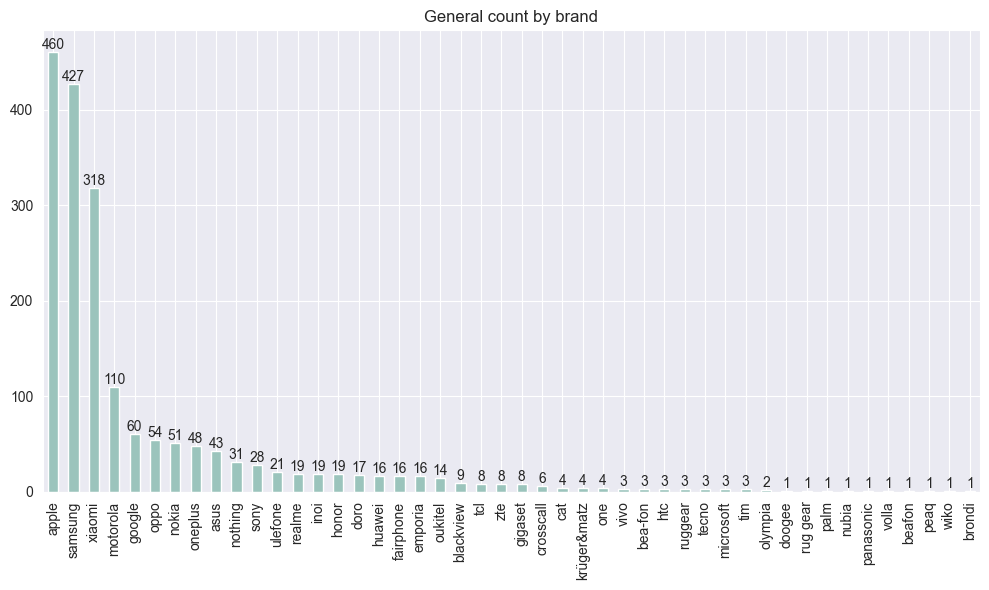

In [10]:
# COUNTS OF ITEMS BY BRAND

# Get counts of items grouped by 'brand'

brand_counts = df_phones['brand'].value_counts().sort_values(ascending=False)
# Calculate the total count of items
total_items_count = brand_counts.sum()

print(f"Total count of brands: {len(brand_counts)}")
print(f"Total count of items:  {total_items_count}")

# Plot the bar plot
plt.figure(figsize=(10, 6))
ax = brand_counts.plot(kind='bar', color='#9BC4BC')

# Annotate the count values on the bars
for i, count in enumerate(brand_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')

plt.title('General count by brand')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.savefig('Plots/04_count_brand_barplot.svg', format='svg')

In [ ]:
# Separate by sources
sources = df_phones['source'].unique()
sources

# Initialize an empty list to store brand counts per source
brand_counts_per_source = []

# Loop through each source
for source in sources:
    # Filter the DataFrame for the specific source
    df_source = df_phones[df_phones['source'] == source]
    
    # Get counts of items grouped by 'brand' for this source
    brand_counts = df_source['brand'].value_counts().reset_index()
    brand_counts.columns = ['brand', 'count']  # Rename columns
    brand_counts['source'] = source  # Add source column
    
    # Append the brand counts for this source to the list
    brand_counts_per_source.append(brand_counts)

# Concatenate the brand counts for all sources into a single DataFrame
brand_counts_per_source_df = pd.concat(brand_counts_per_source, ignore_index=True)

brand_counts_per_source_df

In [17]:
# SPLIT BY RESELLER
brand_counts_total = df_phones['brand'].value_counts()

# Loop through each source
for source in sources:
    # Filter the DataFrame for the specific source
    df_source = df_phones[df_phones['source'] == source]
    
    # Get counts of items grouped by 'brand' for this source
    brand_counts = df_source['brand'].value_counts().reset_index()
    brand_counts.columns = ['brand', 'count']  # Rename columns
    brand_counts['source'] = source  # Add source column
    
    # Append the brand counts for this source to the list
    brand_counts_per_source.append(brand_counts)

# Concatenate the brand counts for all sources into a single DataFrame
brand_counts_per_source_df = pd.concat(brand_counts_per_source, ignore_index=True)

# Sort the brand counts based on the overall count across all sources
brand_counts_per_source_df = brand_counts_per_source_df.sort_values(by='brand', ascending=False,
                                                                    key=lambda x: x.map(brand_counts_total))

# Create the bar plot using seaborn with custom colors
plt.figure(figsize=(10, 6))
sns.barplot(data=brand_counts_per_source_df, x='brand', y='count', hue='source', palette=custom_palette)
plt.title('Brand count by reseller')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Reseller')

plt.tight_layout()

plt.savefig('Plots/05_count_brand_barplot.svg', format='svg')

NameError: name 'sources' is not defined

## 5. Reviews and ratings

FileNotFoundError: [Errno 2] No such file or directory: 'Plots/06_mean_reviews_barplots.svg'

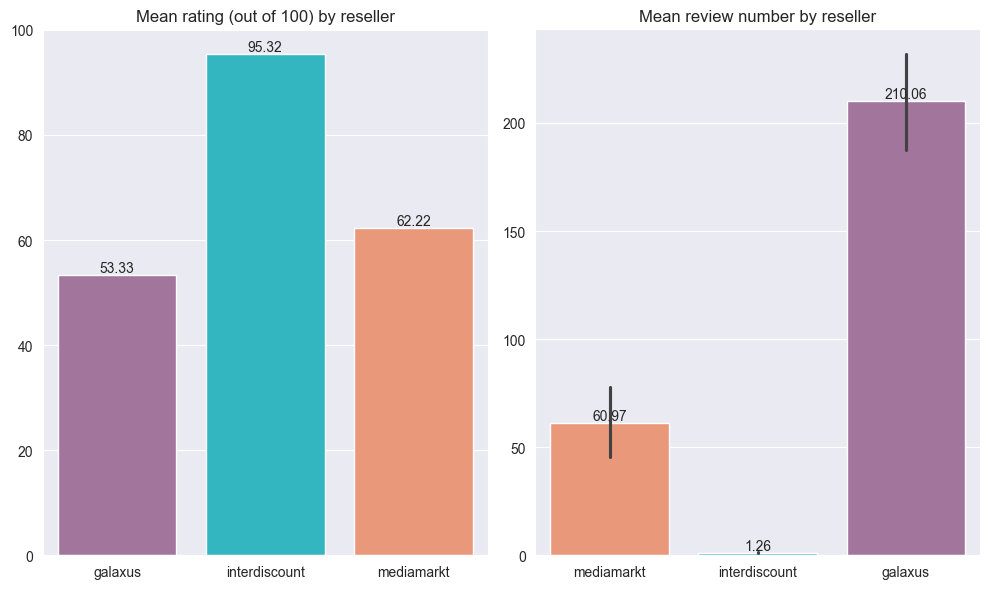

In [12]:
# Creating subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 6))  # Adjust figsize as needed

# Filter rows containing 'rating_100'
filtered_df_rating = df_phones[df_phones['rating_100'].notnull()]

# Calculate mean rating_100 for each source
mean_ratings = filtered_df_rating.groupby('source')['rating_100'].mean().reset_index()

# Create the barplot for mean ratings
sns.barplot(x='source', y='rating_100', data=mean_ratings, hue='source', palette=custom_palette, ax=axs[0])
axs[0].set_title('Mean rating (out of 100) by reseller')
axs[0].set_xlabel('')
axs[0].set_ylabel('')

# Add value labels to the mean ratings plot
for index, row in mean_ratings.iterrows():
    axs[0].text(index, row['rating_100'], f'{row["rating_100"]:.2f}', ha='center', va='bottom')

# Filter rows containing 'review_count'
filtered_df_review = df_phones[df_phones['reviews_count'].notnull()]

# Calculate mean review count for each source
mean_review_count = filtered_df_review.groupby('source')['reviews_count'].mean().reset_index()

# Create the bar plot for mean review count
sns.barplot(x='source', y='reviews_count', data=filtered_df_review, hue='source', palette=custom_palette, ax=axs[1])
axs[1].set_title('Mean review number by reseller')
axs[1].set_xlabel('')
axs[1].set_ylabel('')

# Add values on top of the bars in the second plot
for bar in axs[1].patches:
    height = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom')

plt.tight_layout()

plt.savefig('Plots/06_mean_reviews_barplots.svg', format='svg')

## 6. Delivery times

FileNotFoundError: [Errno 2] No such file or directory: 'Plots/07_mean_delivery_time_barplots.svg'

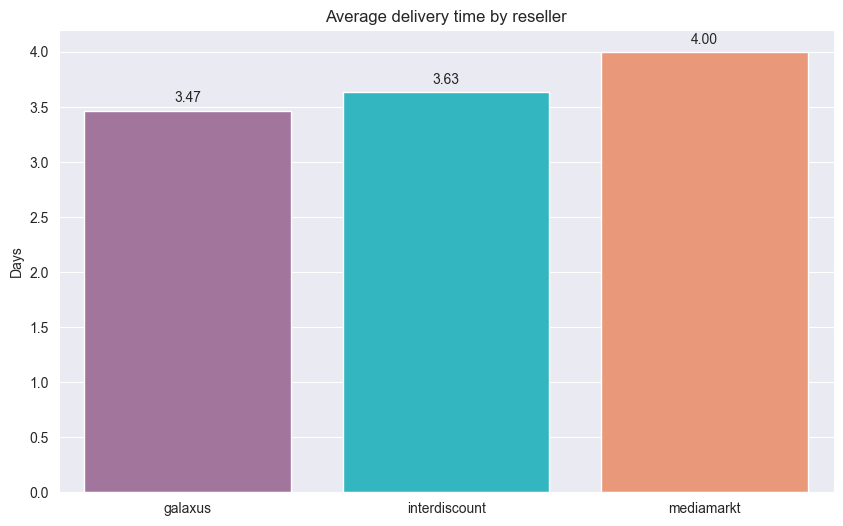

In [13]:
# Grouping by 'source' and calculating the average 'delivery_time'
avg_delivery_time = df_phones.groupby('source')['delivery_time'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='source', y='delivery_time', data=avg_delivery_time, palette=custom_palette)
plt.xlabel('')
plt.ylabel('Days')
plt.title('Average delivery time by reseller')


# Adding annotations
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'), 
                (bar.get_x() + bar.get_width() / 2., bar.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.savefig('Plots/07_mean_delivery_time_barplots.svg', format='svg')

## 7. Phone value: screen/price metric

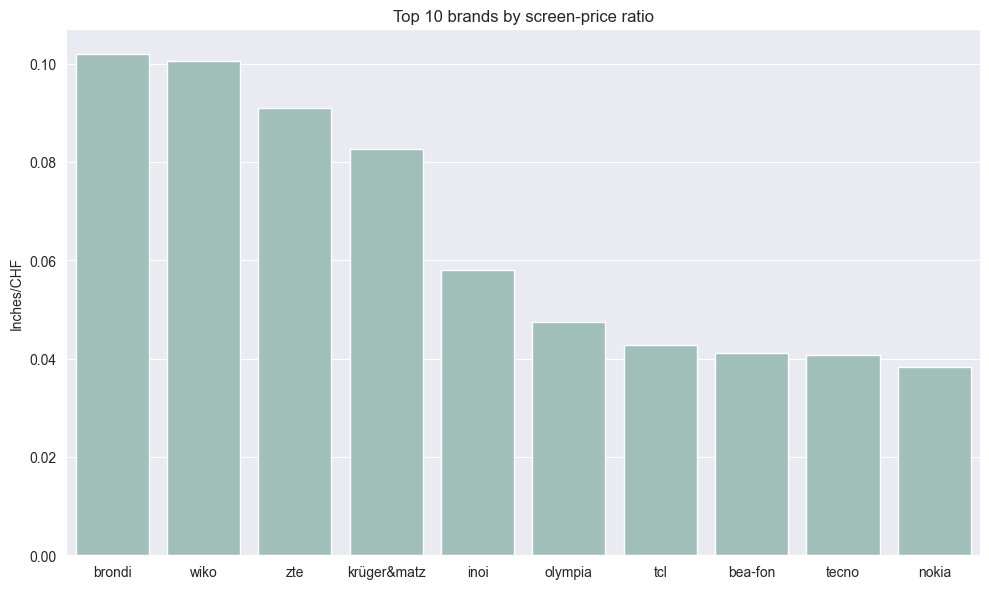

In [16]:
avg_screen_price_ratio = df_phones.groupby('brand')['screen_price_ratio'].mean().reset_index()

# Selecting the top 10 brands based on mean 'screen_price_ratio'
top_10_brands = avg_screen_price_ratio.nlargest(10, 'screen_price_ratio')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='brand', y='screen_price_ratio', data=top_10_brands, color='#9BC4BC')
plt.xlabel('')
plt.ylabel('Inches/CHF')
plt.title('Top 10 brands by screen-price ratio')
plt.tight_layout()

plt.savefig('Plots/08_screen_price_barplots.svg', format='svg')

FileNotFoundError: [Errno 2] No such file or directory: 'Plots/09_screen_price_barplots.svg'

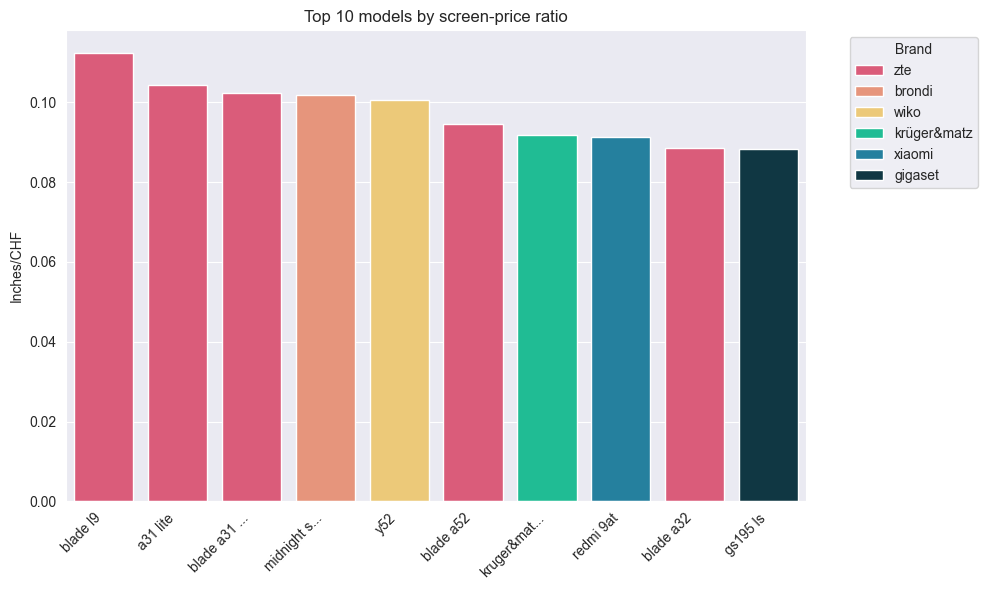

In [15]:
# Grouping by 'model' and calculating the mean 'screen_price_ratio'
avg_screen_price_ratio = df_phones.groupby('model')['screen_price_ratio'].mean().reset_index()

# Selecting the top 10 models based on mean 'screen_price_ratio'
top_10_models = avg_screen_price_ratio.nlargest(10, 'screen_price_ratio')

# Shorten model names if they exceed 10 characters, appending brand name
top_10_models['shortened_model'] = top_10_models['model'].apply(lambda x: x[:10] + '...' if len(x) > 10 else x)

# Merging 'brand' information into the DataFrame
top_10_models = pd.merge(top_10_models, df_phones[['model', 'brand']], on='model', how='left')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='shortened_model', y='screen_price_ratio', hue='brand', ci=False, data=top_10_models, palette=['#EF476F', '#F78C6B', '#FFD166', '#06D6A0', '#118AB2', '#073B4C'])
plt.xlabel('')
plt.ylabel('Inches/CHF')
plt.title('Top 10 models by screen-price ratio')

plt.xticks(rotation=45, ha='right')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('Plots/09_screen_price_barplots.svg', format='svg')